In [ ]:
from google.colab import files
upload = files.upload()

Saving Purchase_Fraud_Data.csv to Purchase_Fraud_Data.csv


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("Purchase_Fraud_Data.csv")
data.shape

(151112, 12)

In [ ]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,ip_address,class,category,dob
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,65278,QVPSPJUOCKZAR,SEO,Chrome,M,7.327584e+08,0,home_essentials,22-2-1976
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,96399,EOGFQPIZPYXFZ,Ads,Chrome,F,3.503114e+08,0,apparels,2-1-1962
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,57296,YSSKYOSJHPPLJ,SEO,Opera,M,2.621474e+09,1,electronics,5-3-1962
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,43650,ATGTXKYKUDUQN,SEO,Safari,M,3.840542e+09,0,health_care,3-7-1974
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,45016,NAUITBZFJKHWW,Ads,Safari,M,4.155831e+08,0,home_essentials,25-8-1970


In [ ]:
data.describe(include="all")

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,ip_address,class,category,dob
count,151112.000000,151112,151112,151112.000000,151112,151112,151112,146185,1.511120e+05,151112.000000,151112,146188
unique,NaN,151112,150663,NaN,137956,3,5,2,NaN,NaN,5,13745
top,NaN,2015-02-24 22:55:49,2015-09-10 09:04:53,NaN,CQTUVBYIWWWBC,SEO,Chrome,M,NaN,NaN,electronics,24-7-1982
freq,NaN,1,3,NaN,20,60615,61432,85445,NaN,NaN,32056,37
mean,200171.040970,NaN,NaN,50521.469003,NaN,NaN,NaN,NaN,2.152145e+09,0.093646,NaN,NaN
std,115369.285024,NaN,NaN,28533.667117,NaN,NaN,NaN,NaN,1.248497e+09,0.291336,NaN,NaN
min,2.000000,NaN,NaN,1016.000000,NaN,NaN,NaN,NaN,5.209350e+04,0.000000,NaN,NaN
25%,100642.500000,NaN,NaN,25919.000000,NaN,NaN,NaN,NaN,1.085934e+09,0.000000,NaN,NaN
50%,199958.000000,NaN,NaN,50484.000000,NaN,NaN,NaN,NaN,2.154770e+09,0.000000,NaN,NaN
75%,300054.000000,NaN,NaN,75296.250000,NaN,NaN,NaN,NaN,3.243258e+09,0.000000,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             146185 non-null  object 
 8   ip_address      151112 non-null  float64
 9   class           151112 non-null  int64  
 10  category        151112 non-null  object 
 11  dob             146188 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 13.8+ MB


In [ ]:
data.isna().sum()

user_id              0
signup_time          0
purchase_time        0
purchase_value       0
device_id            0
source               0
browser              0
sex               4927
ip_address           0
class                0
category             0
dob               4924
dtype: int64

USER ID

In [ ]:
len(data.user_id.unique())  

151112

In [ ]:
data.drop(columns=["user_id"],inplace=True)

Signup Time : Date & Time at which the customer signup in the platform

In [ ]:
data["signup_time"] = pd.to_datetime(data["signup_time"])

In [ ]:
data["signup_time_year"] = data["signup_time"].dt.year
data["signup_time_month"] = data["signup_time"].dt.month
data["signup_time_day"] = data["signup_time"].dt.day
data["signup_time_week"] = data["signup_time"].dt.dayofweek
data["signup_time_hour"] = data["signup_time"].dt.hour
data.drop(columns = ["signup_time"],inplace=True)

Purchase Time:  The latest purchase date & time from a customer

In [ ]:
data["purchase_time"] = pd.to_datetime(data["purchase_time"])

In [ ]:
data["purchase_time_year"] = data["purchase_time"].dt.year
data["purchase_time_month"] = data["purchase_time"].dt.month
data["purchase_time_day"] = data["purchase_time"].dt.day
data["purchase_time_week"] = data["purchase_time"].dt.dayofweek
data["purchase_time_hour"] = data["purchase_time"].dt.hour
data.drop(columns = ["purchase_time"],inplace=True)

Purchase Value : Total purchase amount

In [ ]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS.fit(data[["purchase_value"]])
data.purchase_value = SS.transform(data[["purchase_value"]])
data.head()

,purchase_value,device_id,source,browser,sex,ip_address,class,category,dob,signup_time_year,signup_time_month,signup_time_day,signup_time_week,signup_time_hour,purchase_time_year,purchase_time_month,purchase_time_day,purchase_time_week,purchase_time_hour
0,0.517164,QVPSPJUOCKZAR,SEO,Chrome,M,7.327584e+08,0,home_essentials,22-2-1976,2015,2,24,1,22,2015,4,18,5,2
1,1.607844,EOGFQPIZPYXFZ,Ads,Chrome,F,3.503114e+08,0,apparels,2-1-1962,2015,6,7,6,20,2015,6,8,0,1
2,0.237423,YSSKYOSJHPPLJ,SEO,Opera,M,2.621474e+09,1,electronics,5-3-1962,2015,1,1,3,18,2015,1,1,3,18
3,-0.240820,ATGTXKYKUDUQN,SEO,Safari,M,3.840542e+09,0,health_care,3-7-1974,2015,4,28,1,21,2015,5,4,0,13
4,-0.192947,NAUITBZFJKHWW,Ads,Safari,M,4.155831e+08,0,home_essentials,25-8-1970,2015,7,21,1,7,2015,9,9,2,18


Device ID : Unique device ID from which purchase was done

In [ ]:
data.device_id.unique

<bound method Series.unique of 0         QVPSPJUOCKZAR
1         EOGFQPIZPYXFZ
2         YSSKYOSJHPPLJ
3         ATGTXKYKUDUQN
4         NAUITBZFJKHWW
              ...      
151107    XPSKTWGPWINLR
151108    LYSFABUCPCGBA
151109    MEQHCSJUBRBFE
151110    CMCXFGRHYSTVJ
151111    ZINIADFCLHYPG
Name: device_id, Length: 151112, dtype: object>

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit(data[["device_id"]])
data.device_id = LE.transform(data[["device_id"]])
SS.fit(data[["device_id"]])
data.device_id = SS.transform(data[["device_id"]])
data.head()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,purchase_value,device_id,source,browser,sex,ip_address,class,category,dob,signup_time_year,signup_time_month,signup_time_day,signup_time_week,signup_time_hour,purchase_time_year,purchase_time_month,purchase_time_day,purchase_time_week,purchase_time_hour
0,0.517164,0.508156,SEO,Chrome,M,7.327584e+08,0,home_essentials,22-2-1976,2015,2,24,1,22,2015,4,18,5,2
1,1.607844,-1.127751,Ads,Chrome,F,3.503114e+08,0,apparels,2-1-1962,2015,6,7,6,20,2015,6,8,0,1
2,0.237423,1.563005,SEO,Opera,M,2.621474e+09,1,electronics,5-3-1962,2015,1,1,3,18,2015,1,1,3,18
3,-0.240820,-1.632585,SEO,Safari,M,3.840542e+09,0,health_care,3-7-1974,2015,4,28,1,21,2015,5,4,0,13
4,-0.192947,-0.005644,Ads,Safari,M,4.155831e+08,0,home_essentials,25-8-1970,2015,7,21,1,7,2015,9,9,2,18


Category : Type of product purchased

In [ ]:
data.category.value_counts(normalize = True)

electronics        0.212134
cosmetics          0.198131
apparels           0.197006
health_care        0.196470
home_essentials    0.196258
Name: category, dtype: float64

In [ ]:
temp = pd.get_dummies(data["category"],prefix="Category")
#temp.head()
data = pd.concat([data,temp],axis=1)
data = data.drop(columns=["category"])
data.head()

,purchase_value,device_id,source,browser,sex,ip_address,class,dob,signup_time_year,signup_time_month,signup_time_day,signup_time_week,signup_time_hour,purchase_time_year,purchase_time_month,purchase_time_day,purchase_time_week,purchase_time_hour,Category_apparels,Category_cosmetics,Category_electronics,Category_health_care,Category_home_essentials
0,0.517164,0.508156,SEO,Chrome,M,7.327584e+08,0,22-2-1976,2015,2,24,1,22,2015,4,18,5,2,0,0,0,0,1
1,1.607844,-1.127751,Ads,Chrome,F,3.503114e+08,0,2-1-1962,2015,6,7,6,20,2015,6,8,0,1,1,0,0,0,0
2,0.237423,1.563005,SEO,Opera,M,2.621474e+09,1,5-3-1962,2015,1,1,3,18,2015,1,1,3,18,0,0,1,0,0
3,-0.240820,-1.632585,SEO,Safari,M,3.840542e+09,0,3-7-1974,2015,4,28,1,21,2015,5,4,0,13,0,0,0,1,0
4,-0.192947,-0.005644,Ads,Safari,M,4.155831e+08,0,25-8-1970,2015,7,21,1,7,2015,9,9,2,18,0,0,0,0,1


Source : Medium through which customers reached the platform

In [ ]:
data.source.value_counts(normalize = True)

SEO       0.401126
Ads       0.396269
Direct    0.202605
Name: source, dtype: float64

In [ ]:
temp = pd.get_dummies(data["source"],prefix="Source")
#temp.head()
data = pd.concat([data,temp],axis=1)
data = data.drop(columns=["source"])
data.head()

,purchase_value,device_id,browser,sex,ip_address,class,dob,signup_time_year,signup_time_month,signup_time_day,signup_time_week,signup_time_hour,purchase_time_year,purchase_time_month,purchase_time_day,purchase_time_week,purchase_time_hour,Category_apparels,Category_cosmetics,Category_electronics,Category_health_care,Category_home_essentials,Source_Ads,Source_Direct,Source_SEO
0,0.517164,0.508156,Chrome,M,7.327584e+08,0,22-2-1976,2015,2,24,1,22,2015,4,18,5,2,0,0,0,0,1,0,0,1
1,1.607844,-1.127751,Chrome,F,3.503114e+08,0,2-1-1962,2015,6,7,6,20,2015,6,8,0,1,1,0,0,0,0,1,0,0
2,0.237423,1.563005,Opera,M,2.621474e+09,1,5-3-1962,2015,1,1,3,18,2015,1,1,3,18,0,0,1,0,0,0,0,1
3,-0.240820,-1.632585,Safari,M,3.840542e+09,0,3-7-1974,2015,4,28,1,21,2015,5,4,0,13,0,0,0,1,0,0,0,1
4,-0.192947,-0.005644,Safari,M,4.155831e+08,0,25-8-1970,2015,7,21,1,7,2015,9,9,2,18,0,0,0,0,1,1,0,0


Browser: Browser used while purchasing

In [ ]:
data.browser.value_counts(normalize = True)

Chrome     0.406533
IE         0.243045
Safari     0.163237
FireFox    0.162859
Opera      0.024326
Name: browser, dtype: float64

In [ ]:
temp = pd.get_dummies(data["browser"],prefix="Browser")
#temp.head()
data = pd.concat([data,temp],axis=1)
data = data.drop(columns=["browser"])
data.head()

,purchase_value,device_id,sex,ip_address,class,dob,signup_time_year,signup_time_month,signup_time_day,signup_time_week,signup_time_hour,purchase_time_year,purchase_time_month,purchase_time_day,purchase_time_week,purchase_time_hour,Category_apparels,Category_cosmetics,Category_electronics,Category_health_care,Category_home_essentials,Source_Ads,Source_Direct,Source_SEO,Browser_Chrome,Browser_FireFox,Browser_IE,Browser_Opera,Browser_Safari
0,0.517164,0.508156,M,7.327584e+08,0,22-2-1976,2015,2,24,1,22,2015,4,18,5,2,0,0,0,0,1,0,0,1,1,0,0,0,0
1,1.607844,-1.127751,F,3.503114e+08,0,2-1-1962,2015,6,7,6,20,2015,6,8,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0
2,0.237423,1.563005,M,2.621474e+09,1,5-3-1962,2015,1,1,3,18,2015,1,1,3,18,0,0,1,0,0,0,0,1,0,0,0,1,0
3,-0.240820,-1.632585,M,3.840542e+09,0,3-7-1974,2015,4,28,1,21,2015,5,4,0,13,0,0,0,1,0,0,0,1,0,0,0,0,1
4,-0.192947,-0.005644,M,4.155831e+08,0,25-8-1970,2015,7,21,1,7,2015,9,9,2,18,0,0,0,0,1,1,0,0,0,0,0,0,1


IP Address

In [ ]:
data.ip_address.value_counts(normalize = True)

1.502818e+09    0.000132
5.760609e+08    0.000132
3.874758e+09    0.000132
2.050964e+09    0.000132
1.800550e+09    0.000126
                  ...   
2.099897e+09    0.000007
1.856830e+09    0.000007
1.637622e+09    0.000007
6.246035e+08    0.000007
4.103825e+09    0.000007
Name: ip_address, Length: 143512, dtype: float64

In [ ]:
SS.fit(data[["ip_address"]])
data.ip_address = SS.transform(data[["ip_address"]])
data.head()

,purchase_value,device_id,sex,ip_address,class,dob,signup_time_year,signup_time_month,signup_time_day,signup_time_week,signup_time_hour,purchase_time_year,purchase_time_month,purchase_time_day,purchase_time_week,purchase_time_hour,Category_apparels,Category_cosmetics,Category_electronics,Category_health_care,Category_home_essentials,Source_Ads,Source_Direct,Source_SEO,Browser_Chrome,Browser_FireFox,Browser_IE,Browser_Opera,Browser_Safari
0,0.517164,0.508156,M,-1.136880,0,22-2-1976,2015,2,24,1,22,2015,4,18,5,2,0,0,0,0,1,0,0,1,1,0,0,0,0
1,1.607844,-1.127751,F,-1.443207,0,2-1-1962,2015,6,7,6,20,2015,6,8,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0
2,0.237423,1.563005,M,0.375916,1,5-3-1962,2015,1,1,3,18,2015,1,1,3,18,0,0,1,0,0,0,0,1,0,0,0,1,0
3,-0.240820,-1.632585,M,1.352348,0,3-7-1974,2015,4,28,1,21,2015,5,4,0,13,0,0,0,1,0,0,0,1,0,0,0,0,1
4,-0.192947,-0.005644,M,-1.390927,0,25-8-1970,2015,7,21,1,7,2015,9,9,2,18,0,0,0,0,1,1,0,0,0,0,0,0,1


sex  

In [ ]:
data.sex.value_counts()

M    85445
F    60740
Name: sex, dtype: int64

In [ ]:
data["sex"] = data.sex.fillna("Unknown")

In [ ]:
temp = pd.get_dummies(data["sex"],prefix="Sex")
#temp.head()
data = pd.concat([data,temp],axis=1)
data = data.drop(columns=["sex"])
data.head()

,purchase_value,device_id,ip_address,class,dob,signup_time_year,signup_time_month,signup_time_day,signup_time_week,signup_time_hour,purchase_time_year,purchase_time_month,purchase_time_day,purchase_time_week,purchase_time_hour,Category_apparels,Category_cosmetics,Category_electronics,Category_health_care,Category_home_essentials,Source_Ads,Source_Direct,Source_SEO,Browser_Chrome,Browser_FireFox,Browser_IE,Browser_Opera,Browser_Safari,Sex_F,Sex_M,Sex_Unknown
0,0.517164,0.508156,-1.136880,0,22-2-1976,2015,2,24,1,22,2015,4,18,5,2,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0
1,1.607844,-1.127751,-1.443207,0,2-1-1962,2015,6,7,6,20,2015,6,8,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,0.237423,1.563005,0.375916,1,5-3-1962,2015,1,1,3,18,2015,1,1,3,18,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
3,-0.240820,-1.632585,1.352348,0,3-7-1974,2015,4,28,1,21,2015,5,4,0,13,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
4,-0.192947,-0.005644,-1.390927,0,25-8-1970,2015,7,21,1,7,2015,9,9,2,18,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0


DOB

In [ ]:
data[["dob"]].describe()

,dob
count,146188
unique,13745
top,24-7-1982
freq,37


In [ ]:
Mode_DOB = data[["dob"]].mode()
print(Mode_DOB)

         dob
0  24-7-1982


In [ ]:
data["dob"] = data.dob.fillna("24-7-1982")

In [ ]:
data["dob"] = pd.to_datetime(data["dob"])

In [ ]:
data["dob"] = data["dob"].dt.year

In [ ]:
data["Age_at_purchase"] = data["purchase_time_year"] - data["dob"]

In [ ]:
data["Age_at_purchase"].describe()

count    151112.000000
mean         33.849013
std           9.439681
min          18.000000
25%          27.000000
50%          33.000000
75%          39.000000
max          76.000000
Name: Age_at_purchase, dtype: float64

In [ ]:
data = data.drop(columns=["dob"])
data.head()

,purchase_value,device_id,ip_address,class,signup_time_year,signup_time_month,signup_time_day,signup_time_week,signup_time_hour,purchase_time_year,purchase_time_month,purchase_time_day,purchase_time_week,purchase_time_hour,Category_apparels,Category_cosmetics,Category_electronics,Category_health_care,Category_home_essentials,Source_Ads,Source_Direct,Source_SEO,Browser_Chrome,Browser_FireFox,Browser_IE,Browser_Opera,Browser_Safari,Sex_F,Sex_M,Sex_Unknown,Age_at_purchase
0,0.517164,0.508156,-1.136880,0,2015,2,24,1,22,2015,4,18,5,2,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,39
1,1.607844,-1.127751,-1.443207,0,2015,6,7,6,20,2015,6,8,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,53
2,0.237423,1.563005,0.375916,1,2015,1,1,3,18,2015,1,1,3,18,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,53
3,-0.240820,-1.632585,1.352348,0,2015,4,28,1,21,2015,5,4,0,13,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,41
4,-0.192947,-0.005644,-1.390927,0,2015,7,21,1,7,2015,9,9,2,18,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,45


In [ ]:
SS.fit(data[["Age_at_purchase"]])
data.Age_at_purchase = SS.transform(data[["Age_at_purchase"]])
data.head()

,purchase_value,device_id,ip_address,class,signup_time_year,signup_time_month,signup_time_day,signup_time_week,signup_time_hour,purchase_time_year,purchase_time_month,purchase_time_day,purchase_time_week,purchase_time_hour,Category_apparels,Category_cosmetics,Category_electronics,Category_health_care,Category_home_essentials,Source_Ads,Source_Direct,Source_SEO,Browser_Chrome,Browser_FireFox,Browser_IE,Browser_Opera,Browser_Safari,Sex_F,Sex_M,Sex_Unknown,Age_at_purchase
0,0.517164,0.508156,-1.136880,0,2015,2,24,1,22,2015,4,18,5,2,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0.545676
1,1.607844,-1.127751,-1.443207,0,2015,6,7,6,20,2015,6,8,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,2.028782
2,0.237423,1.563005,0.375916,1,2015,1,1,3,18,2015,1,1,3,18,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,2.028782
3,-0.240820,-1.632585,1.352348,0,2015,4,28,1,21,2015,5,4,0,13,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0.757548
4,-0.192947,-0.005644,-1.390927,0,2015,7,21,1,7,2015,9,9,2,18,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1.181292


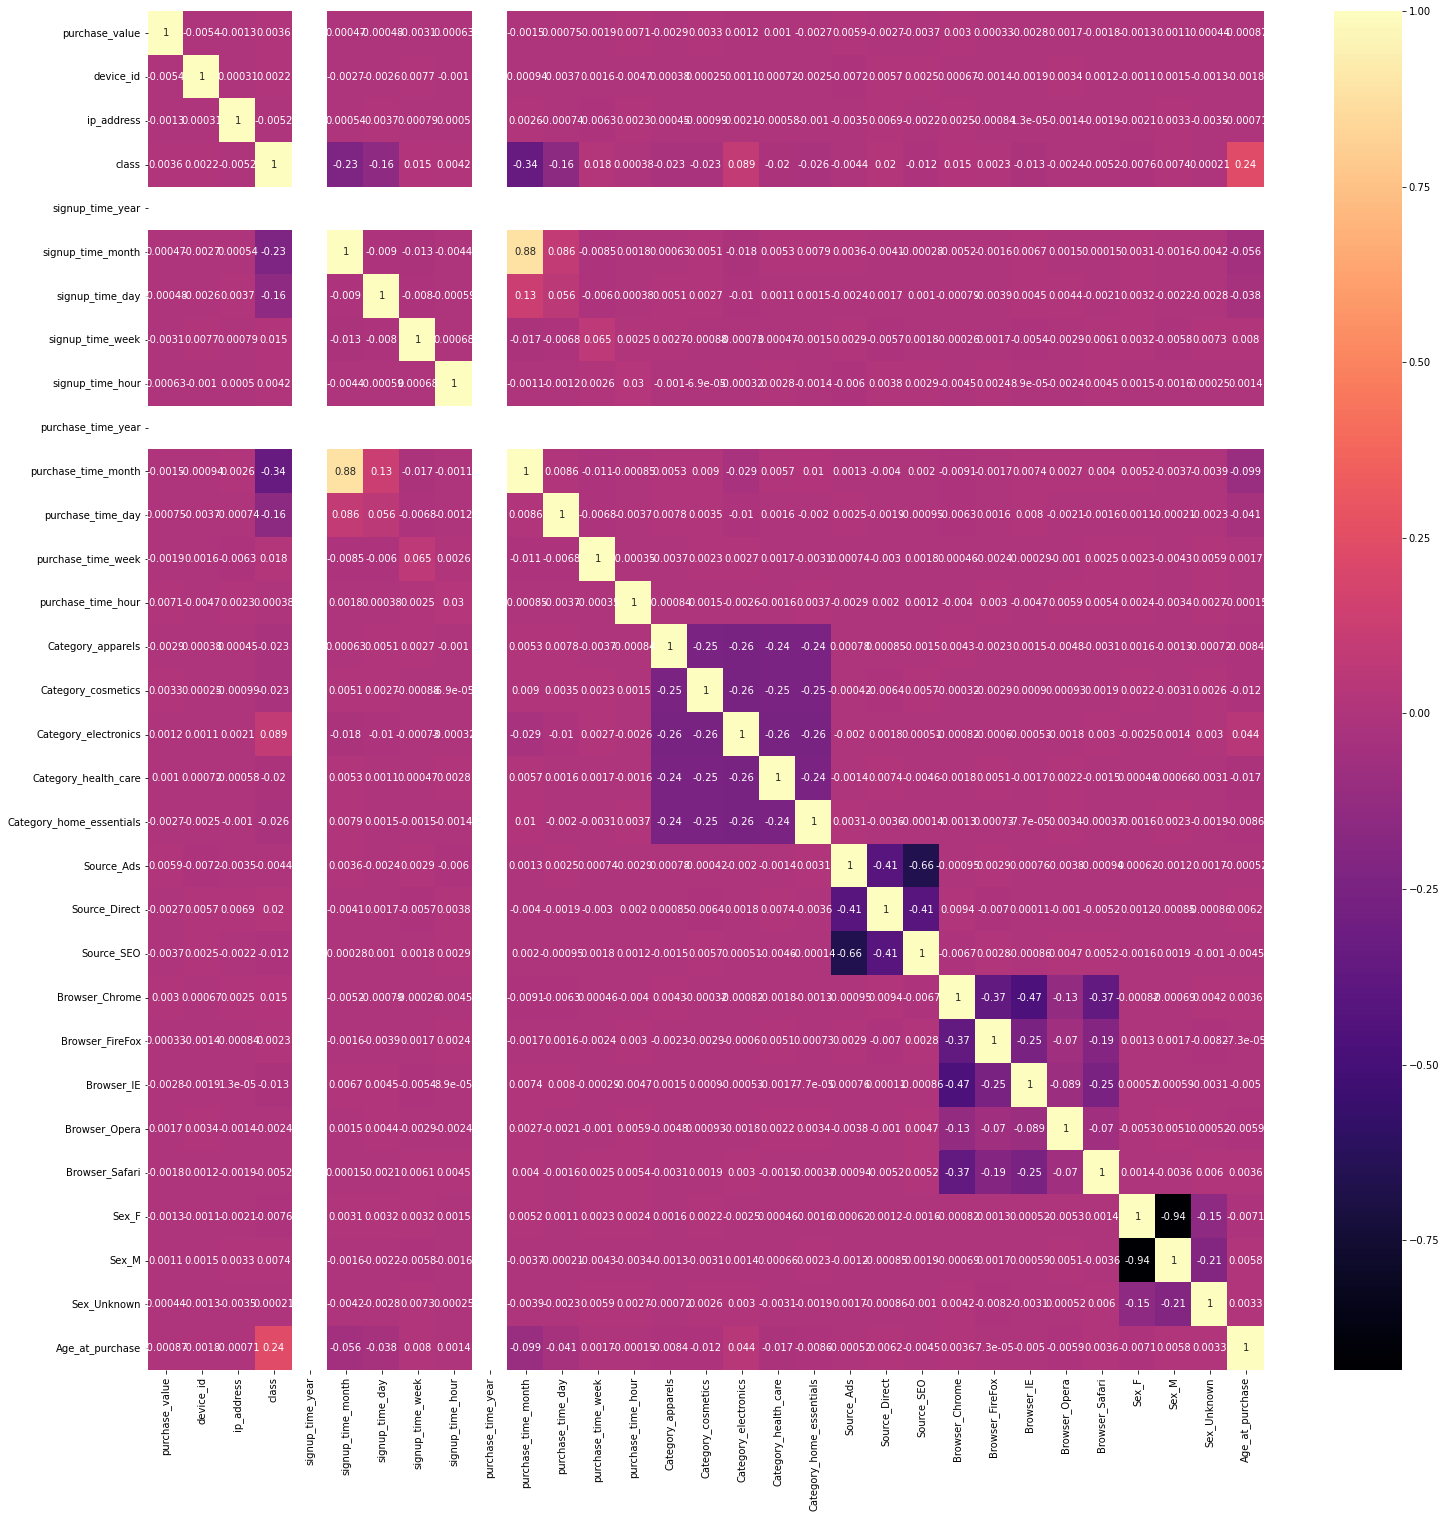

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="magma")

In [ ]:
X = data.drop(columns=["class"])
y = data[["class"]]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=55,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((113334, 30), (37778, 30), (113334, 1), (37778, 1))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# ***K-Nearest Neighbour***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
M2 = KNeighborsClassifier()
M2.fit(X_train,y_train)
y_pred2 = M2.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred2))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy :  0.9614855206734078


In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
print('R^2 score is:', r2_score(y_test, y_pred2))
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

Mean Absolute Error: 0.038514479326592195
Mean Squared Error: 0.038514479326592195
Root Mean Squared Error: 0.1962510619757055
R^2 score is: 0.5462565477354016
Accuracy :  0.9614855206734078
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     34240
           1       0.95      0.62      0.75      3538

    accuracy                           0.96     37778
   macro avg       0.95      0.81      0.87     37778
weighted avg       0.96      0.96      0.96     37778



In [ ]:
confusion_matrix(y_test,y_pred2)


array([[34115,   125],
       [ 1330,  2208]])

In [ ]:
#v=pd.DataFrame({'Actual': y_test, 'Predicted_Logreg' : y_pred1, 'Predicted_KNeigh' : y_pred2, 'Predicted_naiveB': y_pred3, 'Predicted_SVC' : y_pred4, 'Predicted_Decisionentropy': y_pred5, 'Predicted_Decision_gini': y_pred6})
#v.Actual.value_counts(),v.Predicted_Logreg.value_counts(),v.Predicted_KNeigh.value_counts(),v.Predicted_naiveB.value_counts(),v.Predicted_SVC.value_counts(),v.Predicted_Decisionentropy.value_counts(),v.Predicted_Decision_gini.value_counts()
